In [9]:
# import libraries and packages

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import data

data = pd.read_csv("C:\\Users\\Roma\\Downloads\\4.Boston Housing\\HousingData.csv")
data.head()

In [4]:
# rows and columns in data
data.shape

(506, 14)

In [5]:
# column names of data
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [6]:
# Descriptive Statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
# Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
# Missing values

data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [11]:
# Correlation
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


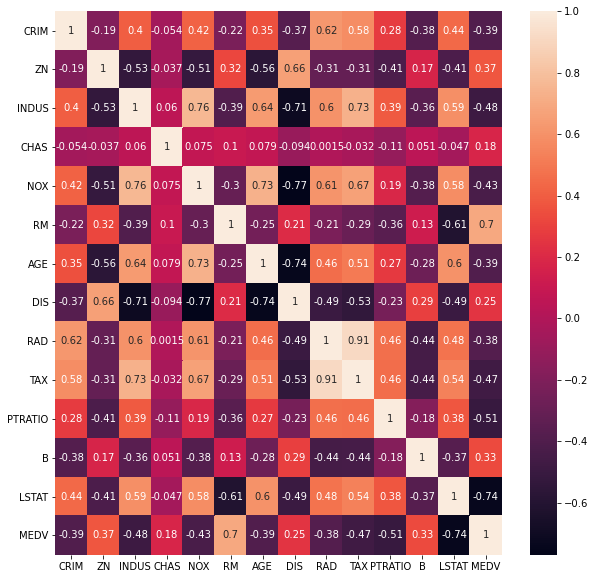

In [14]:
# Correlation Plot

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [18]:
# Correlation between "MEDV" and other variables

data.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64

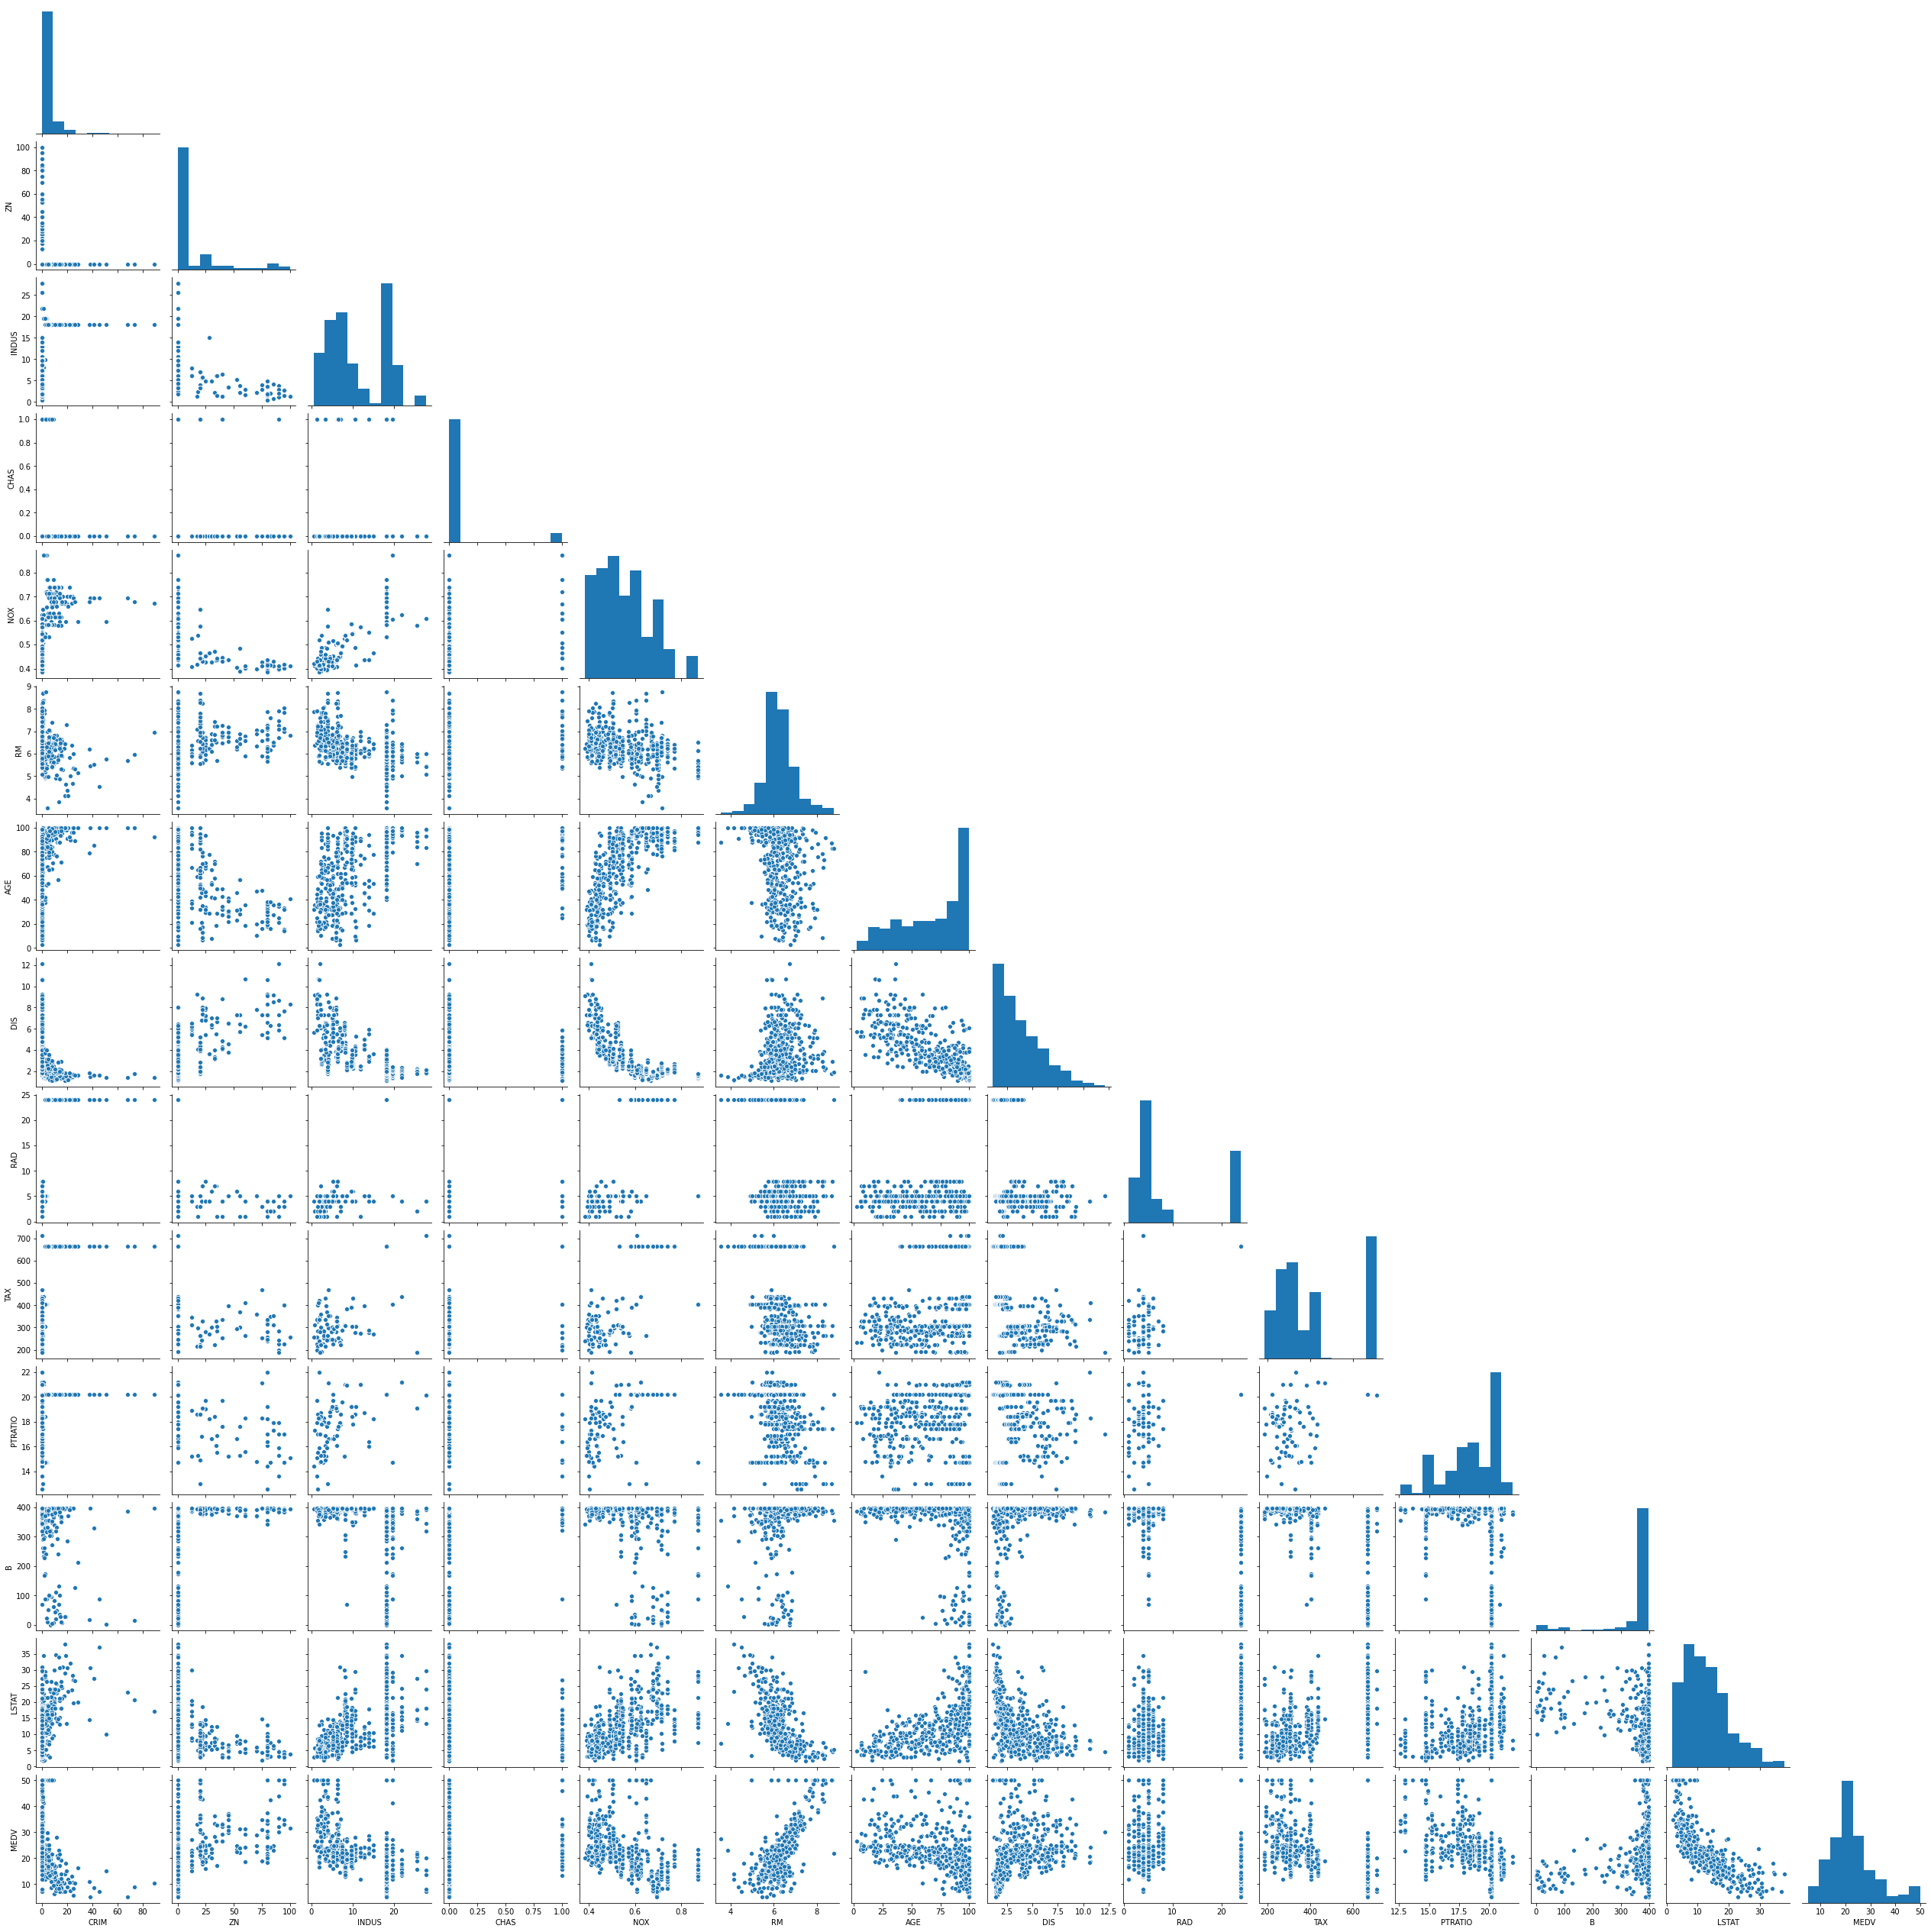

In [16]:
sns.pairplot(data,corner=True)

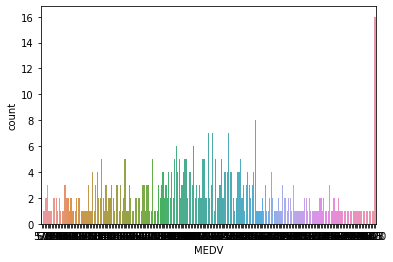

In [34]:
sns.countplot(data.MEDV)

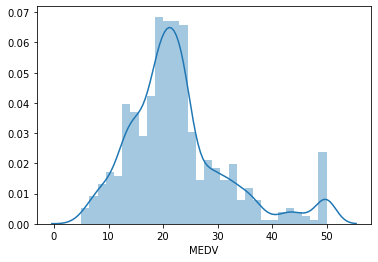

In [35]:
sns.distplot(data.MEDV, bins = 30)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
# split data into X and y values
X=data.drop(['CHAS','MEDV'],axis=1) #CHAS variable does seems relevent for this task.
y=data['MEDV']

In [24]:
#split train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=124)

In [25]:
#KNN IMPUTER 

# Impute with KNNImputer
knn_impute = KNNImputer(n_neighbors=5,weights = 'distance')

# transform the Na with the strategy
X_train_filled_knn = knn_impute.fit_transform(X_train)
X_test_filled_knn = knn_impute.fit_transform(X_test)

#Convert the arrays created back to Dataframe
X_train_filled_knn= pd.DataFrame(X_train_filled_knn,columns=X_train.columns)
X_test_filled_knn=pd.DataFrame(X_test_filled_knn,columns=X_test.columns)

#Perform the model
knn_imputed_model = LinearRegression()
knn_imputed_model.fit(X_train_filled_knn,y_train)
y_pred_knn=knn_imputed_model.predict(X_test_filled_knn)

#Check the RMSE score
RMSE_knn_model = np.sqrt(mean_squared_error(y_pred_knn,y_test))
print('This is the score of KNNImputer:', RMSE_knn_model)

This is the score of KNNImputer: 5.363488333506354


In [30]:
# MEAN IMPUTER

# IMPUTE WITH MEAN
mean_imputer = SimpleImputer(strategy = 'mean')

# Transform with NA with the strategy
X_train_filled_mean = mean_imputer.fit_transform(X_train)
X_test_filled_mean = mean_imputer.transform(X_test)

# Convert the arrays created back to Dataframe
X_train_filled_mean = pd.DataFrame(X_train_filled_mean, columns = X_train.columns)
X_test_filled_mean = pd.DataFrame(X_test_filled_mean, columns = X_test.columns)

# Perform model
mean_imputed_model = LinearRegression()
mean_imputed_model.fit(X_train_filled_mean,y_train)
y_pred_mean = mean_imputed_model.predict(X_test_filled_mean)

RMSE_mean_model = np.sqrt(mean_squared_error(y_pred_mean,y_test))
print('This is the score of meanimputer:', RMSE_mean_model)
                                

This is the score of meanimputer: 5.423077497226504


In [32]:
# MEDIAN IMPUTER

# IMPUTE WITH MEDIAN
median_imputer = SimpleImputer(strategy = 'median')

# Transform with NA 
X_train_filled_median = median_imputer.fit_transform(X_train)
X_test_filled_median = median_imputer.transform(X_test)

# Convert arrays to dataframe
X_train_filled_median = pd.DataFrame(X_train_filled_median, columns = X_train.columns)
X_test_filled_median = pd.DataFrame(X_test_filled_median, columns = X_test.columns)

# Perform model
median_imputed_model = LinearRegression()
median_imputed_model .fit(X_train_filled_median,y_train)
y_pred_median = median_imputed_model.predict(X_test_filled_median)

RMSE_median_model = np.sqrt(mean_squared_error(y_pred_median,y_test))
print('This is the score of meanimputer:', RMSE_median_model)

This is the score of meanimputer: 5.429619781012983
